<a href="https://colab.research.google.com/github/cvs2010/machine_learning_image_recog/blob/main/imagerecognition_binary_catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando a biblioteca do Python TensorFlow (Machine Learning):
TensorFlow é uma biblioteca de código-fonte aberto amigável para Python para computação numérica que torna o aprendizado de máquina mais rápido e fácil.

In [2]:
import tensorflow as tf

In [3]:
%tensorflow_version 2.1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [5]:
!nvidia-smi

Tue Apr 18 17:45:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Importando a biblioteca keras (DeepLearning) do TensorFlow: Keras é uma biblioteca aberta de Deep Learning implementada utilizando TensorFlow para diversas linguagens/plataformas, como Python e R, como foco na sua facilidade para utilização. Ela permite modelar e treinar modelos de redes neurais com poucas linhas de código.

In [6]:
from keras.preprocessing import image

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

A Biblioteca OS é muito utilizada para fazer automação de processos no Python, então você pode fazer algumas automações

O NumPy é uma biblioteca para a linguagem Python com funções para se trabalhar com computação numérica. Seu principal objeto é o vetor n-dimensional, ou ndarray . Um vetor n-dimensional também é conhecido pelo nome tensor.

O Matplotlib é uma biblioteca Python frequentemente utilizada para ciência de dados. A ferramenta de código aberto oferece recursos de plotagem para a criação de gráficos 2D e 3D com visualizações estáticas, animadas e interativas.

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np

Biblioteca utilizada para criar "logs" de Erros na execução do código

In [9]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Importação do URL com as imagens para análise do MachineLearning

In [10]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/

cats_and_dogs
|__ train
    |__ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |__ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ validation
    |__ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |__ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
|__ test: [1.jpg, 2.jpg, 3.jpg ...]


Buscar o diretório com o arquivo ZIP das imagens e buscar por tipo de arquivo realizando um print

Segregando os diretórios Base, Treino, Validação e TESTE para leitura do MachineLearning

In [11]:
base_dir = os.path.join(os.path.dirname(PATH), 'cats_and_dogs')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test') #directory of test pictures

train_cats_dir = os.path.join(train_dir, 'cats') #directory of training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') #directory of training cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') #directory of validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') #directory of validation cat pictures

Criando as variáveis para identificar os diretórios

In [12]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

num_test = len(os.listdir(test_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
total_test = num_test

'Printando' o total do treino e da validação de imagens

In [13]:
print('total training cat images', num_cats_tr)
print('total training dog images', num_dogs_tr)

print('total validation cat images', num_cats_tr)
print('total validation dog images', num_dogs_tr)
print('--')
print('total training images', total_train)
print('total validation images', total_val)
print('total test images', total_test)

total training cat images 1000
total training dog images 1000
total validation cat images 1000
total validation dog images 1000
--
total training images 2000
total validation images 1000
total test images 51


Número de exemplos de formatação a processar antes de atualizar as variáveis dos modelos.
Os dados de formação consistem em largura e altura das imagens de 150 pixels

In [14]:
BATCH_SIZE = 100 # Number of training examples to process before updating model's variables
IMG_SHAPE = 150 # Training data consists of image's width and height of 150 pixels

Ajustando a escala do Gerador

In [15]:
import zipfile

In [16]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

102967424/102967424 [==============================] - 6s 0us/step


In [17]:
!wget https://github.com/cvs2010/machine_learning_image_recog/raw/main/Transfer-Learning-Data.zip
path = "/content/Transfer-Learning-Data.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

--2023-04-18 17:45:53--  https://github.com/cvs2010/machine_learning_image_recog/raw/main/Transfer-Learning-Data.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cvs2010/machine_learning_image_recog/main/Transfer-Learning-Data.zip [following]
--2023-04-18 17:45:53--  https://raw.githubusercontent.com/cvs2010/machine_learning_image_recog/main/Transfer-Learning-Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5628925 (5.4M) [application/zip]
Saving to: ‘Transfer-Learning-Data.zip’

Transfer-Learning-D 100%[===================>]   5.37M  --.-KB/s    in 0.02s   

2023-04-18 17:45:54 (

In [18]:
model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [19]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)   # Generator for training data
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)   # Generator for validation data
test_image_generator = ImageDataGenerator(rescale=1./255)   # Generator for validation data

In [20]:
train_generator = train_image_generator.flow_from_directory('/content/Transfer Learning Data/train',
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 202 images belonging to 2 classes.


In [21]:
val_data_gen = validation_image_generator.flow_from_directory('/content/Transfer Learning Data/train',
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 202 images belonging to 2 classes.


In [22]:
val_test_gen = test_image_generator.flow_from_directory(batch_size=32,
                                                        directory='/content/Transfer Learning Data/',
                                                        shuffle=False,
                                                        target_size=(224,224), #150 x 150 px
                                                        )

Found 202 images belonging to 1 classes.


In [23]:
sample_training_images, _ = next(train_generator)

In [24]:
# The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list,
# although the probabilities list is optional.If you created the `train_data_gen` variable correctly,
# then running the cell below will plot five random training images.
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

Parâmetros de ajuste da acurácia

Apresentar os resultados da acurácia e perda do código

In [25]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

94765736/94765736 [==============================] - 6s 0us/step


In [26]:
x = base_model.output

In [27]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [28]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='softmax')(x)

In [29]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [30]:
model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [84]:
EPOCHS = 20
history = model.fit_generator(
    train_generator,
    epochs = EPOCHS,
)

Epoch 1/20


<ipython-input-84-2d32cb77eb56>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


7/7 [==============================] - 2s 296ms/step - loss: 0.2600 - accuracy: 0.9010
Epoch 2/20
7/7 [==============================] - 2s 311ms/step - loss: 0.1146 - accuracy: 0.9505
Epoch 3/20
7/7 [==============================] - 2s 316ms/step - loss: 0.0700 - accuracy: 0.9802
Epoch 4/20
7/7 [==============================] - 2s 297ms/step - loss: 0.1237 - accuracy: 0.9802
Epoch 5/20
7/7 [==============================] - 2s 297ms/step - loss: 0.3634 - accuracy: 0.9010
Epoch 6/20
7/7 [==============================] - 2s 297ms/step - loss: 0.2151 - accuracy: 0.9010
Epoch 7/20
7/7 [==============================] - 2s 300ms/step - loss: 0.2408 - accuracy: 0.9010
Epoch 8/20
7/7 [==============================] - 2s 351ms/step - loss: 0.0907 - accuracy: 0.9752
Epoch 9/20
7/7 [==============================] - 2s 302ms/step - loss: 0.0299 - accuracy: 0.9901
Epoch 10/20
7/7 [==============================] - 2s 304ms/step - loss: 0.0152 - accuracy: 0.9950
Epoch 11/20
7/7 [=============

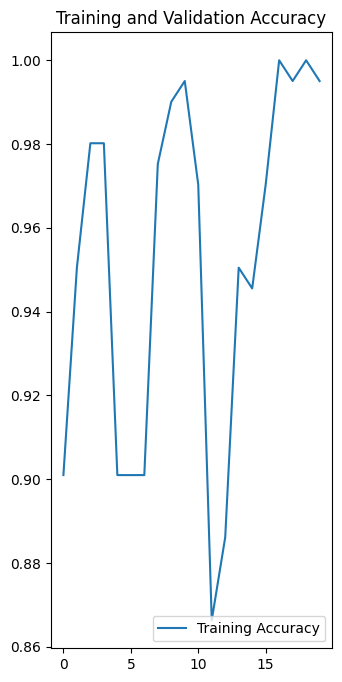

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('./foo.png')
plt.show()

Agora é hora de usar o seu modelo para prever se uma nova imagem é um gato ou um cachorro.
Nesta célula final, temos a probabilidade de cada imagem de teste (`test_data_gen`) ser um cão ou um gato. As 'probabilidades' devem ser uma lista de inteiros. 
Chamamos a função `plotImages` e passamos as imagens de teste e as probabilidades correspondentes a cada imagem de teste.
Depois de executar a célula, teremos todas as 50 imagens de teste com uma etiqueta mostrando a percentagem de certeza de que a imagem é um gato ou um cão. A exatidão corresponderá a exatidão mostrada no gráfico acima (depois de executar a célula anterior). Mais imagens de treino podem levar a uma maior precisão.

--2023-04-18 18:03:25--  https://regatta.vteximg.com.br/arquivos/ids/263138-565-565/Colete-Ativa-De-Flutuacao-Para-Cachorro-Amarelo-01.jpg?v=637361134245170000
Resolving regatta.vteximg.com.br (regatta.vteximg.com.br)... 13.227.254.92, 13.227.254.63, 13.227.254.110, ...
Connecting to regatta.vteximg.com.br (regatta.vteximg.com.br)|13.227.254.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33583 (33K) [image/jpeg]
Saving to: ‘Colete-Ativa-De-Flutuacao-Para-Cachorro-Amarelo-01.jpg?v=637361134245170000’

Colete-Ativa-De-Flu 100%[===================>]  32.80K  --.-KB/s    in 0.002s  

2023-04-18 18:03:26 (21.1 MB/s) - ‘Colete-Ativa-De-Flutuacao-Para-Cachorro-Amarelo-01.jpg?v=637361134245170000’ saved [33583/33583]



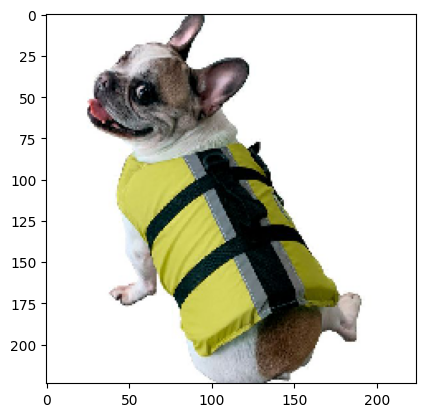

In [95]:
!wget https://regatta.vteximg.com.br/arquivos/ids/263138-565-565/Colete-Ativa-De-Flutuacao-Para-Cachorro-Amarelo-01.jpg?v=637361134245170000
sample_image = tf.keras.preprocessing.image.load_img(r'/content/abcde.jpg', target_size=(224,224))
plt.imshow(sample_image)

In [96]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
np.shape(sample_image)

(224, 224, 3)

In [97]:
sample_image = np.expand_dims(sample_image, axis = 0)
np.shape(sample_image)

(1, 224, 224, 3)

In [98]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [99]:
predictions = model.predict(sample_image)
print(predictions)

1/1 [==============================] - 0s 52ms/step
[[0. 1.]]


Salva o modelo treinado no caminhodo GoogleDrive: /content/drive/MyDrive/Colab Notebooks/Saved Models/

Nas seguintes extensões: .json .h5 .hdf5

In [100]:
# caminho para o diretório desejado
save_path = '/content/drive/MyDrive/Colab Notebooks/Saved Models/'

# serialize model to JSON
model_json = model.to_json()

# verifique se o diretório existe, crie-o se necessário
if not os.path.exists(save_path):
    os.makedirs(save_path)

# salve o arquivo no diretório especificado
with open(os.path.join(save_path, "modelo.json"), "w") as json_file:
    json_file.write(model_json)
print("Saved modelo.json to disk")

Saved modelo.json to disk


In [101]:
# serialize weights to H5
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Saved Models/modelo.h5')
print("Saved modelo.h5 to disk")

Saved modelo.h5 to disk


In [102]:
# serialize weights to HDF5
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Saved Models/modelo.hdf5')
print("Saved modelo.hdf5 to disk")

Saved modelo.hdf5 to disk
